# Generate data

In [1]:
# Create a synthetic data set

# Load required libraries
library(dplyr)

# Set seed for reproducibility
set.seed(42)

# Create synthetic dataset
n_students <- 480
student_data <- data.frame(
  Student_ID = 1:n_students,
  Assessment_1 = round(runif(n_students, min = 00, max = 100), 1),  # Random scores for Assessment 1
  Assessment_2 = round(runif(n_students, min = 00, max = 90), 1),  # Random scores for Assessment 2
  Assessment_3A = round(runif(n_students, min = 00, max = 95), 1), # Random scores for Assessment 3A
  Assessment_3B = round(runif(n_students, min = 00, max = 92), 1), # Random scores for Assessment 3B
  Log_in_Frequency = sample(1:30, n_students, replace = TRUE),      # Random login frequencies
  Session_Duration = round(runif(n_students, min = 1, max = 75), 1), # Random session durations
  Program_code = sample(1:15, n_students, replace = TRUE),          # Random program codes
  Enrollment_Status = sample(c("Full-time", "Part-time"), n_students, replace = TRUE) # Random enrollment status
)

# Calculate final score
student_data <- student_data %>%
  mutate(
    Final_Score = round(Assessment_1 * 0.15 + Assessment_2 * 0.35 + Assessment_3A * 0.35 + Assessment_3B * 0.15, 1)
  )

# View first few rows of the dataset
head(student_data)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Student_ID,Assessment_1,Assessment_2,Assessment_3A,Assessment_3B,Log_in_Frequency,Session_Duration,Program_code,Enrollment_Status,Final_Score
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>
1,1,91.5,21.0,39.0,57.8,12,49.1,10,Part-time,43.4
2,2,93.7,51.9,63.0,22.3,3,41.1,1,Full-time,57.6
3,3,28.6,75.7,2.6,85.4,29,50.5,2,Full-time,44.5
4,4,83.0,11.9,77.5,54.5,15,71.7,1,Full-time,51.9
5,5,64.2,80.6,7.1,33.2,14,53.7,7,Full-time,45.3
6,6,51.9,40.5,85.6,56.0,1,26.2,3,Part-time,60.3


# Explore data

## Calculate summary statistics

In [2]:


# Calculate Mean, Median, and SD for each assessment and final score
summary_stats <- data.frame(
  Assessment = c("Assessment 1", "Assessment 2", "Assessment 3A", "Assessment 3B", "Final Score"),
  Mean = c(mean(student_data$Assessment_1), mean(student_data$Assessment_2), mean(student_data$Assessment_3A), mean(student_data$Assessment_3B), mean(student_data$Final_Score)),
  Median = c(median(student_data$Assessment_1), median(student_data$Assessment_2), median(student_data$Assessment_3A), median(student_data$Assessment_3B), median(student_data$Final_Score)),
  SD = c(sd(student_data$Assessment_1), sd(student_data$Assessment_2), sd(student_data$Assessment_3A), sd(student_data$Assessment_3B), sd(student_data$Final_Score))
)

# Print the summary statistics table
print(summary_stats)

     Assessment     Mean Median       SD
1  Assessment 1 49.10813  48.10 29.22413
2  Assessment 2 44.27833  43.65 26.09379
3 Assessment 3A 45.64375  44.75 27.80318
4 Assessment 3B 46.12313  48.95 27.34912
5   Final Score 45.75646  45.65 14.30714


### Display in interactive table

In [4]:
# Install and load DT package 
install.packages("DT")
library(DT)

Installing package into 'C:/Users/NexteqSolutions-UAT/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'DT' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NexteqSolutions-UAT\AppData\Local\Temp\RtmpMdTrqi\downloaded_packages


In [3]:
# Render the summary statistics as an interactive table
datatable(summary_stats, options = list(pageLength = 5, autoWidth = TRUE))

ERROR: Error in datatable(summary_stats, options = list(pageLength = 5, autoWidth = TRUE)): could not find function "datatable"


# Data Manipulation

## Add a grade column

In [5]:
library(dplyr)

# Create Grade column based on Final_Score
student_data <- student_data %>%
  mutate(Grade = case_when(
    Final_Score >= 80 ~ "HD",
    Final_Score >= 70 & Final_Score < 80 ~ "D",
    Final_Score >= 60 & Final_Score < 70 ~ "Credit",
    Final_Score >= 50 & Final_Score < 60 ~ "Pass",
    Final_Score < 50 ~ "Fail",
    TRUE ~ "Unknown"  # In case there are any missing values or unexpected scores
  ))

# View the updated dataset with the Grade column
head(student_data)

,Student_ID,Assessment_1,Assessment_2,Assessment_3A,Assessment_3B,Log_in_Frequency,Session_Duration,Program_code,Enrollment_Status,Final_Score,Grade
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>
1,1,91.5,21.0,39.0,57.8,12,49.1,10,Part-time,43.4,Fail
2,2,93.7,51.9,63.0,22.3,3,41.1,1,Full-time,57.6,Pass
3,3,28.6,75.7,2.6,85.4,29,50.5,2,Full-time,44.5,Fail
4,4,83.0,11.9,77.5,54.5,15,71.7,1,Full-time,51.9,Pass
5,5,64.2,80.6,7.1,33.2,14,53.7,7,Full-time,45.3,Fail
6,6,51.9,40.5,85.6,56.0,1,26.2,3,Part-time,60.3,Credit


# Analysis

## Assessment scores distribution

In [ ]:
#install.packages("ggplot2")


In [ ]:
#install.packages("tidyr")

In [ ]:
library(ggplot2)

In [6]:
# Convert your dataset from wide format to long format
library(tidyr)

# Gather the assessment columns into key-value pairs
student_data_long <- gather(student_data, key = "Assessment", value = "Score", 
                            Assessment_1, Assessment_2, Assessment_3A, Assessment_3B, Final_Score)

# View the transformed dataset 
head(student_data_long)

,Student_ID,Log_in_Frequency,Session_Duration,Program_code,Enrollment_Status,Grade,Assessment,Score
,<int>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<dbl>
1,1,12,49.1,10,Part-time,Fail,Assessment_1,91.5
2,2,3,41.1,1,Full-time,Pass,Assessment_1,93.7
3,3,29,50.5,2,Full-time,Fail,Assessment_1,28.6
4,4,15,71.7,1,Full-time,Pass,Assessment_1,83.0
5,5,14,53.7,7,Full-time,Fail,Assessment_1,64.2
6,6,1,26.2,3,Part-time,Credit,Assessment_1,51.9


In [ ]:
# Create the box plot for each assessment
ggplot(student_data_long, aes(x = Assessment, y = Score)) + 
  geom_boxplot(fill = "skyblue", color = "black", outlier.colour = "red", outlier.shape = 16) +
  labs(title = "Box Plot of Assessment Scores", x = "Assessment", y = "Score") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

In [ ]:
# install.packages("dplyr")


## Program code vs. grades

In [9]:
# Calculate the percentage of each grade by Program Code
grade_percentage <- student_data %>%
  group_by(Program_code, Grade) %>%
  summarise(Count = n(), .groups = "drop") %>%  # Use .groups = "drop" to prevent grouping in the output
  group_by(Program_code) %>%
  mutate(Percentage = (Count / sum(Count)) * 100) %>%
  ungroup()

# View the grade percentage table (optional)
head(grade_percentage)

Program_code,Grade,Count,Percentage
<int>,<chr>,<int>,<dbl>
1,Credit,3,11.111111
1,D,1,3.703704
1,Fail,17,62.962963
1,Pass,6,22.222222
2,Credit,2,8.000000
2,D,1,4.000000


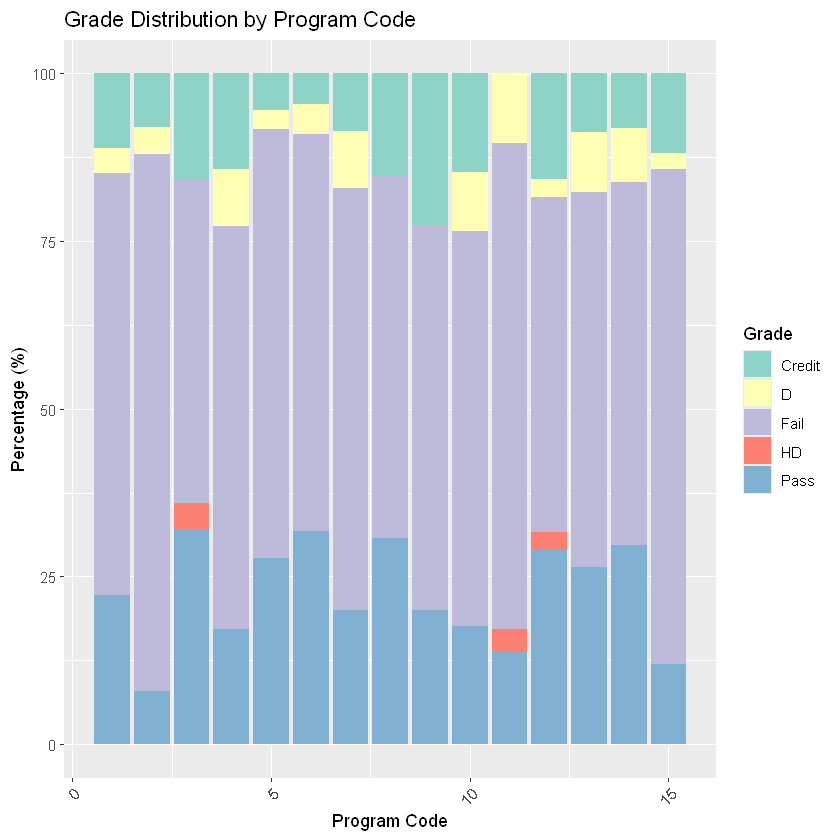

In [10]:
library(ggplot2)
# Bar plot for grade distribution by Program Code
ggplot(grade_percentage, aes(x = Program_code, y = Percentage, fill = Grade)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Grade Distribution by Program Code", x = "Program Code", y = "Percentage (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set3")  # Color palette for better visual appeal

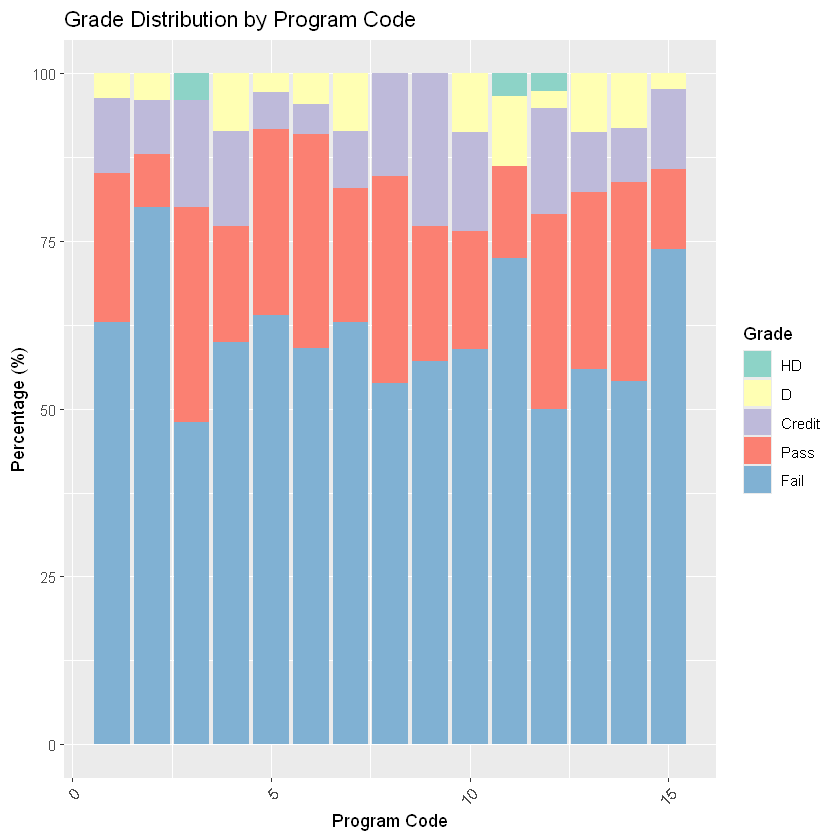

In [11]:
# Reorder the Grade factor to control the stacking order
grade_percentage$Grade <- factor(grade_percentage$Grade, levels = c("HD", "D", "Credit", "Pass", "Fail"))

# Bar plot for grade distribution by Program Code
ggplot(grade_percentage, aes(x = Program_code, y = Percentage, fill = Grade)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Grade Distribution by Program Code", x = "Program Code", y = "Percentage (%)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for readability
  scale_fill_brewer(palette = "Set3")  # Color palette for better visual appeal

## Session Duration over Final Score

`geom_smooth()` using formula = 'y ~ x'


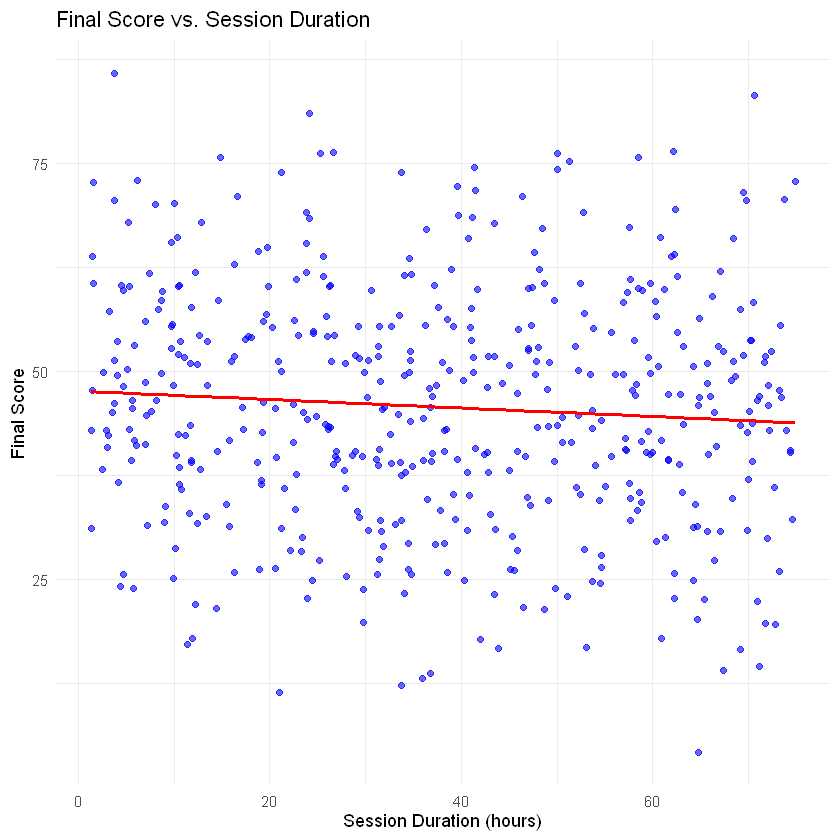

In [12]:
# Scatter plot of Final Score vs. Session Duration
ggplot(student_data, aes(x = Session_Duration, y = Final_Score)) +
  geom_point(color = "blue", alpha = 0.6) +  # Points in blue with some transparency
  labs(title = "Final Score vs. Session Duration", 
       x = "Session Duration (hours)", 
       y = "Final Score") +
  theme_minimal() +  # Minimal theme for better readability
  geom_smooth(method = "lm", color = "red", se = FALSE)  # Optional: Add a regression line

In [ ]:
head(student_data)

## Enrolment status vs. grade

`summarise()` has grouped output by 'Enrollment_Status'. You can override using
the `.groups` argument.


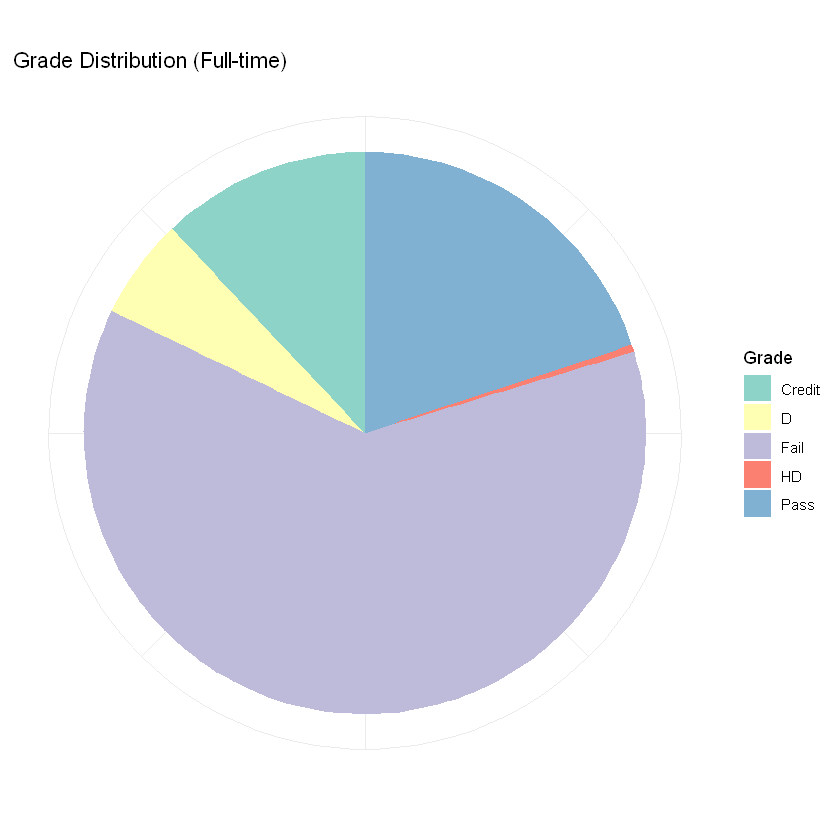

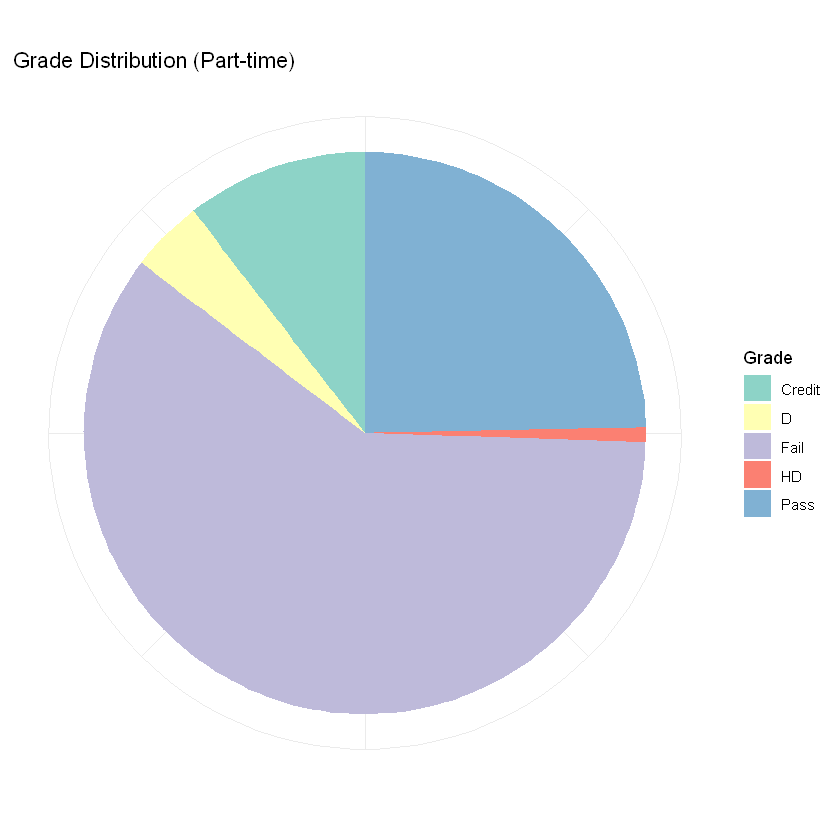

In [13]:
# Summarize data by enrollment status and grade
grade_summary <- student_data %>%
  group_by(Enrollment_Status, Grade) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = Count / sum(Count) * 100)

# Create pie charts
# Full-time students
full_time_data <- grade_summary %>% filter(Enrollment_Status == "Full-time")
full_time_pie <- ggplot(full_time_data, aes(x = "", y = Percentage, fill = Grade)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Grade Distribution (Full-time)", x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.text = element_blank(), axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Set3")

# Part-time students
part_time_data <- grade_summary %>% filter(Enrollment_Status == "Part-time")
part_time_pie <- ggplot(part_time_data, aes(x = "", y = Percentage, fill = Grade)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  labs(title = "Grade Distribution (Part-time)", x = NULL, y = NULL) +
  theme_minimal() +
  theme(axis.text = element_blank(), axis.ticks = element_blank()) +
  scale_fill_brewer(palette = "Set3")

# Display the plots
print(full_time_pie)
print(part_time_pie)